In [90]:
import numpy as np
import cv2
import IPython
from PIL import Image
import matplotlib.pyplot as plt



def split_matrix(matrix): # divide the matrix into 4 quadrants
    leftSide, rightSide = np.split(matrix, 2, axis=1)
    appr, vD = np.split(leftSide, 2, axis=0)
    hD, dD = np.split(rightSide, 2, axis=0)
    
    return appr, hD, vD, dD

def imshow(image, width=None):
    _, ret = cv2.imencode('.jpg', image)
    i = IPython.display.Image(data=ret, width=width)
    IPython.display.display(i)

def jpg_to_pgm(jpg_path):
    image = Image.open(jpg_path)
    image_gray = image.convert('L')
    width = image_gray.size[0]
    if (width>512):
        image_gray = image_gray.resize((512, 512))
        pixels = list(image_gray.getdata())

    else: pixels = list(image_gray.getdata())

    return np.array(pixels).reshape((512, 512))

def p_new(matrix):
    max,min  = np.max(matrix), np.min(matrix)
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            matrix[i][j] = ((matrix[i][j]-min)*255.0)/(max-min)
    return matrix

In [91]:
def daubechies_coeffs(rows):

    matrix_coeffs = np.zeros((rows, rows))

    for i in range(rows // 2):
        if i < rows // 2 - 1:
            matrix_coeffs[i, 2 * i:2 * i + 4] = h_coeffs
        else:
            matrix_coeffs[i, 2 * i:2 * i + 2] = h_coeffs[:2]
            matrix_coeffs[i, 0:2] = h_coeffs[2:]

    for i in range(rows // 2):
        if i < rows // 2 - 1:
            matrix_coeffs[i + rows // 2, 2 * i:2 * i + 4] = g_coeffs
        else:
            matrix_coeffs[i + rows // 2, 2 * i:2 * i + 2] = g_coeffs[:2]
            matrix_coeffs[i + rows // 2, 0:2] = g_coeffs[2:]

    return (np.round(matrix_coeffs, 4))

def obtener_submatriz(matriz):
    n = len(matriz)
    submatriz = [fila[:n//2] for fila in matriz[:n//2]]
    return submatriz

def daubechies4_wavelet_transform_2D(daubechies_coeffs_,image,rows, scale):
    result_H = []
    
    if(scale >= 1):
        for row in image: #ESTA PARTE HACE LA HORIZONTAL
            result_H.append(np.dot(daubechies_coeffs_,row))

        result_V = np.dot(daubechies_coeffs_,result_H)

        if (scale == 1):

            # plt.imshow(result_V, cmap="gray")
            # plt.show()
        
            return result_V

        else:
            result_V = obtener_submatriz(result_V)
            n_rows = len(result_V)
            scale = scale - 1
            return daubechies4_wavelet_transform_2D(daubechies_coeffs(n_rows),result_V,n_rows,scale)

def inverse_daubechies4_wavelet_transform_2D(daubechies_coeffs_, result_V):
    daubechies_coeffs_transpose = np.transpose(daubechies_coeffs_)
    result_H = np.dot(daubechies_coeffs_transpose, result_V)

    image = []
    for row in result_H:
        original_row = np.dot(daubechies_coeffs_transpose, row)
        image.append(original_row)

    return np.array(image)

root2, root3 = np.sqrt(2), np.sqrt(3) 

h_coeffs = np.array([(1 + root3) / (4 * root2),
                     (3 + root3) / (4 * root2),
                     (3 - root3) / (4 * root2),
                     (1 - root3) / (4 * root2)])

g_coeffs = np.array([h_coeffs[3], 
                    -h_coeffs[2],
                     h_coeffs[1], 
                    -h_coeffs[0]])

In [92]:
photo = "/home/juanca632/PersonalProjects/stage/wavelet-transform/imagen.jpg"
scale = 1

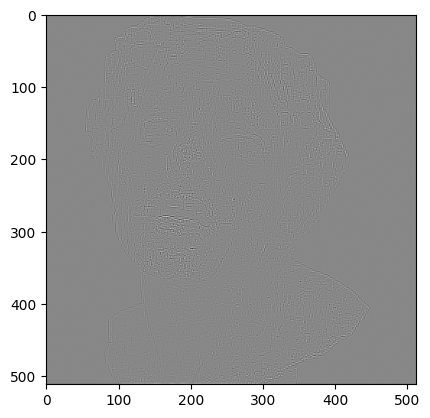

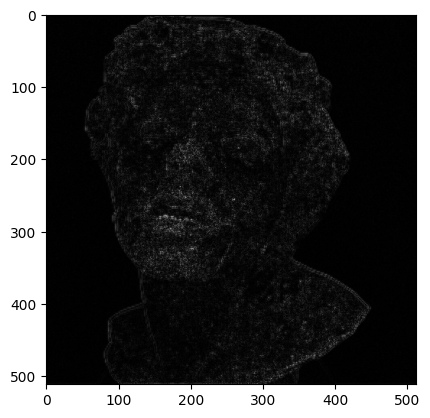

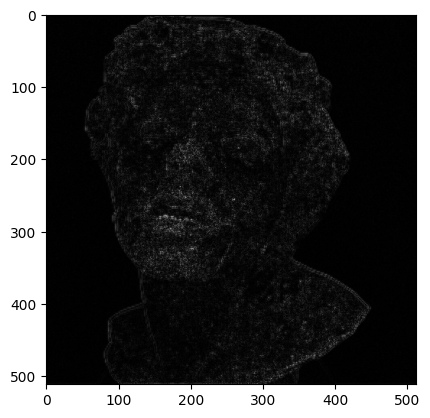

In [93]:
array_photo = jpg_to_pgm(photo)
rows, cols = array_photo.shape
# daubechies_4 = daubechies_coeffs(rows)
result_img = daubechies4_wavelet_transform_2D((daubechies_coeffs(rows)),array_photo,rows, scale)
# reconstructed = inverse_daubechies4_wavelet_transform_2D(daubechies_4,result_img)


# aP,cH,cV,cD = split_matrix(result_img)

# sup_img = np.concatenate((p_new(aP),p_new(cH)), axis=1)
# inf_img = np.concatenate((p_new(cV),p_new(cD)), axis=1)
# result_img = np.concatenate((sup_img,inf_img), axis=0)


# ##########
# fig, ax = plt.subplots(1, 2, figsize=(10, 10))
# ax[0].imshow(array_photo, cmap='gray')
# ax[0].set_title('Original')
# ax[1].imshow((result_img), cmap='gray')
# ax[1].set_title('Wavelet Transform')
# # ax[2].imshow((reconstructed), cmap='gray')
# # ax[2].set_title('Reconstructed')
# plt.show()
# #########
# fig, axes = plt.subplots(1, 4, figsize=(10, 10))
# axes[0].imshow(p_new(aP), cmap='gray')
# axes[0].set_title('Aproximación')
# axes[1].imshow(p_new(cH), cmap='gray')
# axes[1].set_title('Horizontal')
# axes[2].imshow(p_new(cV), cmap='gray')
# axes[2].set_title('Vertical')
# axes[3].imshow(p_new(cD), cmap='gray')
# axes[3].set_title('Diagonal')

# plt.tight_layout()
# plt.show()

result_img[:rows//2,:rows//2] = np.zeros_like(result_img[:rows//2,:rows//2])

result_img = inverse_daubechies4_wavelet_transform_2D((daubechies_coeffs(rows)),result_img)
plt.imshow(result_img, cmap="gray")
plt.show()

for i in range(len(result_img)):
    for j in range(len(result_img)):
        if(result_img[i][j] < 0):
            result_img[i][j] = result_img[i][j] * -1

plt.imshow(result_img, cmap="gray")
plt.show()

result_img = p_new(result_img)
        
plt.imshow(result_img, cmap="gray")
plt.show()